# Giulia Solinas - First Assignment: Exploratory Data Analysis

- Use case: derive descriptive statistical measures & generate plots.
- Data source: https://www.kaggle.com/competitions/titanic/data


In [1]:
# Import packages

import numpy as np      # linear algebra and arrays
import pandas as pd     # data wrangling

%matplotlib inline
import matplotlib.pyplot as plt     # data visualization
import seaborn as sns               # data visualization

from scipy.stats import mode    # to create additional features
import string   # to create additional features


In [2]:
# Enabling autocompletion in the Jupyther notebook
%config IPCompleter.greedy=True

## Load data

In [3]:
from pathlib import Path
cwd        = Path.cwd()
dataFolder = Path(cwd.parent , 'data')

In [4]:
# train
df_train = pd.read_csv(Path(dataFolder, 'train.csv'))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test
df_test = pd.read_csv(Path(dataFolder, 'test.csv'))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# gender
df_gender = pd.read_csv(Path(dataFolder, 'gender_submission.csv'))

# This dataset is not necessary for the analysis.

In [7]:
# create full dataset by appending the train and test
# NOTE: the append function will be deprecated and will be removed. In the future, use 'pandas.concat' !!!!
df_full = df_train.append(df_test, ignore_index= True)

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_42938/3295624958.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_train.append(df_test, ignore_index= True)


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In total, the combined dataset includes 1309 passengers and it is close to the official passengers' number. Exact numbers of those traveling on the Titanic is not known, but the official total of all passengers and crew is 2,229. The approximate number of passengers seems to be 1316 (see here for a list of sources: https://en.wikipedia.org/wiki/Titanic#).

The passengers' list features 1309 tickets, but not all ticket owners boarded the ship--here, for example, embarked people are 1307 .

The appended `'test'` dataset does not contain information about the survived passengers. Hence, this information is missing also in the full dataset.

In [9]:
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset features

The dataset provides information about passengers who were aboard the Titanic, including details about their demographics, ticket information, cabin location, and survival status. Here's an explanation of the columns in the Titanic dataset:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or did not survive (0).
- Pclass: The passenger's class of travel:
    - 1 = 1st class.
    - 2 = 2nd class.
    - 3 = 3rd class.
- Name: The name of the passenger.
- Sex: The gender of the passenger.
- Age: The age of the passenger. This column may have missing values.
- SibSp: The number of siblings or spouses traveling with the passenger.
- Parch: The number of parents or children traveling with the passenger.
- Ticket: The ticket number.
- Fare: The fare paid by the passenger.
- Cabin: The cabin number where the passenger stayed. This column may have missing values.
- Embarked: The port at which the passenger boarded the ship:
    - C = Cherbourg, a port in France.
    - Q = Queenstown, a port in Ireland.
    - S = Southampton, a port in England.

## Understanding the data

In [11]:
# Inspect the full dataset

df_full.info()

# checking NAs for full dataframe
df_full.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df_full.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


In [13]:
# Inspect the training dataset

df_train.info()

# checking NAs for train dataframe
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [15]:
# Inspect the test dataset

df_test.info()

# checking NAs for test dataframe
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# TODO: cleaning data from NAs

In [17]:
# save the datasets as dataframes and list them
# This is a useful step to then use the list for loops or functions

df_full = pd.DataFrame(df_full)
df_test = pd.DataFrame(df_test)
df_train = pd.DataFrame(df_train)

df_list = [df_full, df_test, df_train ]

## Imputing NAs
- The core variable with missing data is `'Age`'.
    - I will impute the missing values by making assumptions on the median age per class.

- It is not possible to impute the missing values for the variable `'Cabin`' as this variable applies only to 1st and 2nd class passengers and it is not avaialable for 3rd class passengers.

In [18]:
def preprocess_and_visualize_titles(data):
    # Splitting the Name column and extracting titles
    title = [i.split(',')[1].split('.')[0].strip() for i in data['Name']]
    data['title'] = pd.Series(title)

    # Calculate value counts
    value_counts = data['title'].value_counts()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: Text Display of Value Counts as a Table
    cell_text = [[title, count] for title, count in value_counts.items()]
    ax1.table(cellText=cell_text, colLabels=['Title', 'Count'], cellLoc='center', loc='center')
    ax1.axis('off')  # Turn off axes for text output
    ax1.set_title('Value Counts')

    # Subplot 2: Count Plot as Bar Plot
    sns.countplot(data=data, x='title', ax=ax2)
    ax2.set_title('Count Plot')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha='right')

    plt.show()

    # Replacing titles according to specified rules
    data["title"] = data["title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')

    # Plot distribution of title feature after replacement
    sns.set_theme(style="darkgrid")
    custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
    data['title'].value_counts().plot(kind='bar', color=custom_palette, width=0.3)
    plt.title('Distribution of title Feature')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('count')
    plt.show()

    return data


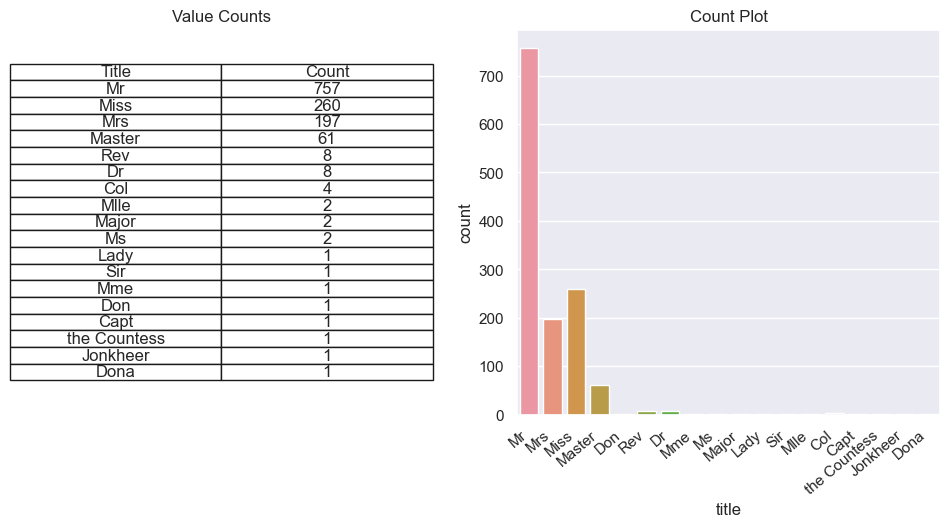

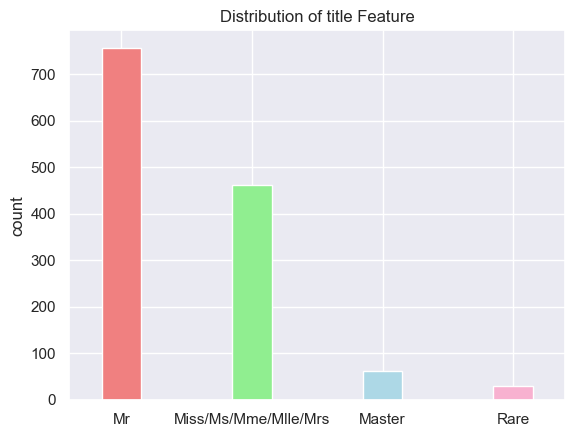

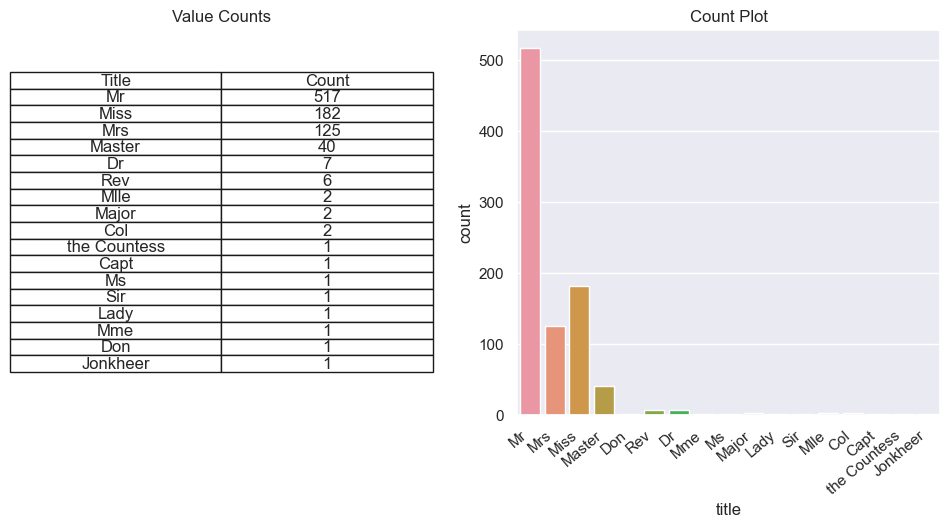

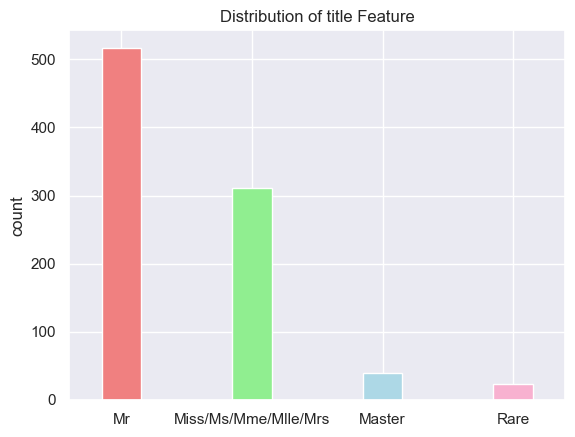

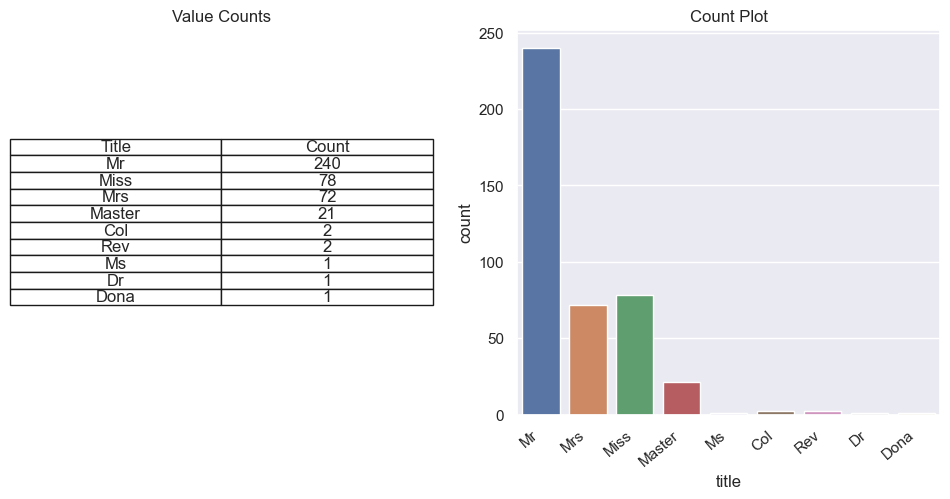

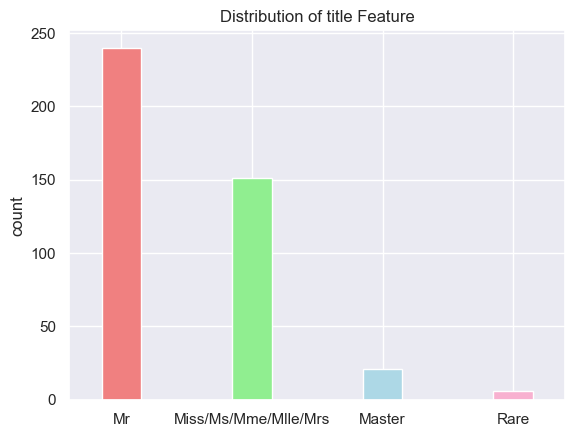

In [21]:
# applying function to the datasets full

df_full = preprocess_and_visualize_titles(df_full)

# apllying function to the other two datasets

df_train = preprocess_and_visualize_titles(df_train)
df_test = preprocess_and_visualize_titles(df_test)



In [22]:
# filling age column according to the passenger data with title based median:
for df in df_list:
    df.loc[(df['title'] == 'Mr') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Master') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Rare') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()


In [23]:
# verifying the NAs
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

In [26]:
df_test.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
title                0
Family_Size          0
Fare_Per_Person      1
Age_Class            0
dtype: int64

## Adding features to the datasets
### Family size, fare per person, and age per class

In [24]:
# Adding features: family size, fares per person, and age per class

# Ideas to create these additional features come from the link (https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
def add_features(df_train, df_test, df_full):
    features = {
        'Family_Size': ('SibSp', 'Parch', lambda df: df['SibSp'] + df['Parch']),
        'Fare_Per_Person': ('Fare', 'Family_Size', lambda df: df['Fare'] / (df['Family_Size'] + 1)),
        'Age_Class': ('Age', 'Pclass', lambda df: df['Age'] * df['Pclass'])
    }

    for df in [df_train, df_test, df_full]:
        for feature, (col1, col2, func) in features.items():
            df[feature] = func(df)

    return df_train, df_test, df_full


# The code above makes the calculation into a single loop and utilizes a dictionary to store the column calculations.

df_train, df_test, df_full = add_features(df_train, df_test, df_full)


### Embarking port
I encode the variable `'Embarked'` as I will check if there is a correlation with the passengers' social status and the port where they embarked.

In [27]:
df_full = pd.get_dummies(df_full, columns=['Embarked'], prefix='Embarked', drop_first=True)
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked', drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked', drop_first=True)

print(df_full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked                 title  \
0      0         A/5 21171   7.2500   NaN        S                    Mr   
1      0          PC 17599  71.2833   C85        C  Miss/Ms/Mme/Mlle/Mrs   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss/Ms/Mme/Mlle/Mrs   
3      0        

## Creating summary tables
- Summary stats
- Correlation table

### Test dataset

In [28]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,29.907895,12.654886,0.17,23.0,28.5,35.75,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating summary graphs
### test dataset

In [ ]:
pd.plotting.scatter_matrix(df_test)

In [ ]:
df_train.fare.plot(kind='hist', bins=50, legend=True)
plt.grid(True)